In the name of Allah

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from sklearn.linear_model import LinearRegression

In [3]:
mpl.rcParams['figure.figsize'] = 8, 2
mpl.rcParams['lines.markersize'] = 0.5
mpl.rcParams['axes.titlesize'] = 'x-small'
mpl.rcParams['axes.labelsize'] = 'x-small'
mpl.rcParams['xtick.labelsize'] = 'xx-small'
mpl.rcParams['ytick.labelsize'] = 'xx-small'

In [4]:
df = pd.read_csv('/content/sample_data/california_housing_train.csv')

In [5]:
y_label = df.columns[-1]
df_y = df[[y_label]]

In [6]:
colors = ['pink', 'yellow', 'orange', 'cyan', 'purple', 'r', 'g', 'b']

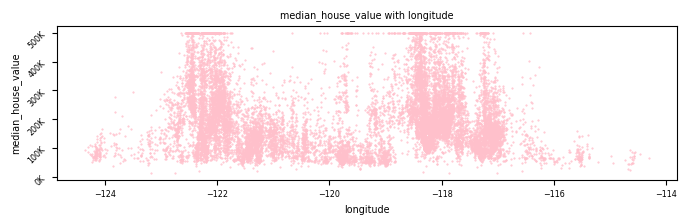

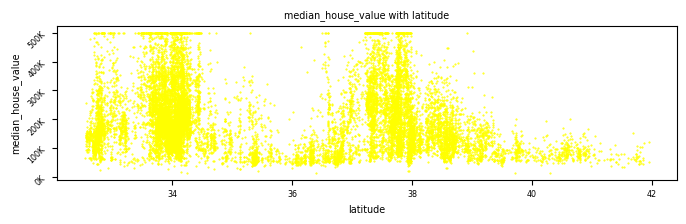

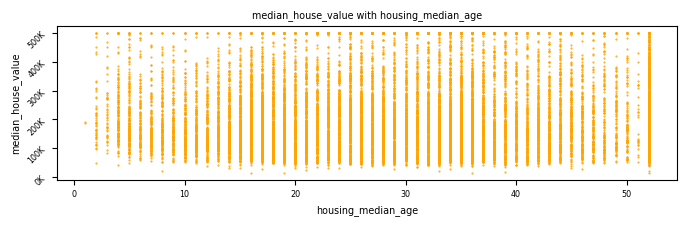

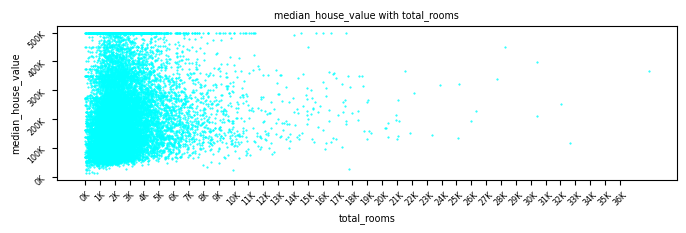

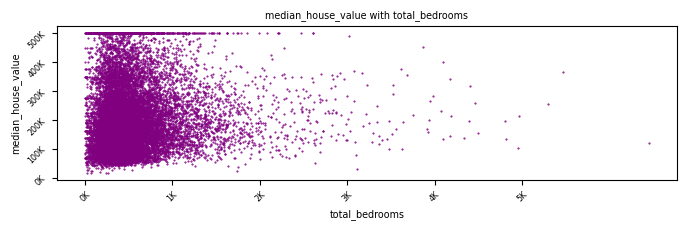

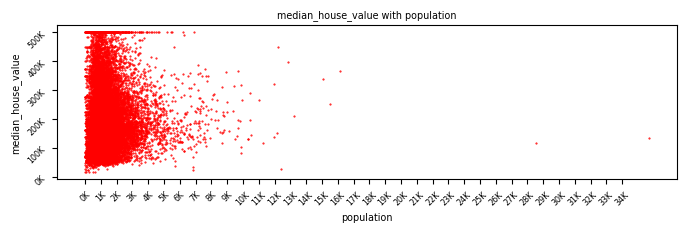

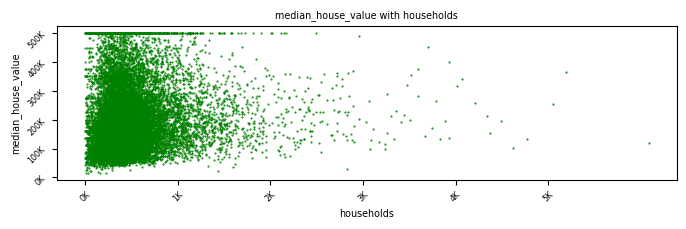

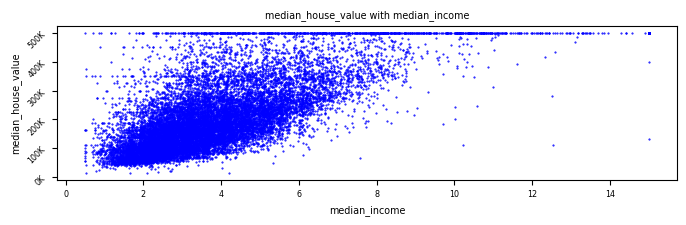

In [7]:
for i, c in enumerate(df.columns[:-1]):
  plt.scatter(df[[c]], df_y, c=colors[i])
  plt.xlabel(c)
  plt.ylabel(y_label)
  plt.yticks([100000 * i for i in range(6)], [f'{100 * i}K' for i in range(6)], rotation=45)
  max_x = int(np.max(df[c]) / 1000)
  if max_x:
    plt.xticks([1000 * i for i in range(max_x)], [f'{1 * i}K' for i in range(max_x)], rotation=45)
  plt.title(f'{y_label} with {c}')
  plt.show()

In [8]:
df_x = df.drop(labels=['median_house_value'], axis=1)

In [9]:
model = LinearRegression()
model.fit(df_x, df_y)

LinearRegression()

In [10]:
model.score(df_x, df_y)

0.6413378529502687

In [16]:
results = []
for c in df.columns[:-1]:
  df_x7 = df_x.drop(labels=[c], axis=1)
  model = LinearRegression()
  model.fit(df_x7, df_y)
  score = model.score(df_x7, df_y)
  results.append(score)
  print(f'removed {c}: {score}')
print(max(results))

removed longitude: 0.5783233444438696
removed latitude: 0.5714098702292323
removed housing_median_age: 0.6289901442842578
removed total_rooms: 0.6393474051266022
removed total_bedrooms: 0.6363929205015468
removed population: 0.6191022527834508
removed households: 0.6407268394704912
removed median_income: 0.38581735392906547
0.6407268394704912


In [17]:
results = []
for c1 in df.columns[:-1]:
  for c2 in df.columns[:-1]:
    df_x6 = df_x.drop(labels=[c1, c2], axis=1)
    model = LinearRegression()
    model.fit(df_x6, df_y)
    score = model.score(df_x6, df_y)
    results.append(score)
    print(f'removed {c1}, {c2}: {score}')
print(max(results))

removed longitude, longitude: 0.5783233444438696
removed longitude, latitude: 0.5713482748283873
removed longitude, housing_median_age: 0.5425765684351205
removed longitude, total_rooms: 0.5695903092007818
removed longitude, total_bedrooms: 0.5756149138242228
removed longitude, population: 0.5563294773052583
removed longitude, households: 0.572836271143074
removed longitude, median_income: 0.19557654732566387
removed latitude, longitude: 0.5713482748283873
removed latitude, latitude: 0.5714098702292323
removed latitude, housing_median_age: 0.5362829951396213
removed latitude, total_rooms: 0.5592769168381144
removed latitude, total_bedrooms: 0.5677620056191517
removed latitude, population: 0.5532473400163045
removed latitude, households: 0.5666014232074752
removed latitude, median_income: 0.1594025444052627
removed housing_median_age, longitude: 0.5425765684351205
removed housing_median_age, latitude: 0.5362829951396213
removed housing_median_age, housing_median_age: 0.6289901442842578
